In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('./data/Corona Pakistan.csv',index_col='SNo')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Reporting Date                               37 non-null     object 
 1   New(Last 24 Hours) - Suspected Cases         24 non-null     float64
 2   Cumulative - Suspected Cases                 24 non-null     float64
 3   Cumulative Tests Performed in Last 24 Hours  8 non-null      float64
 4   Cumulative Tests Performed                   24 non-null     float64
 5   Cumulative Test Positive Cases               24 non-null     float64
 6   Still Admitted                               24 non-null     float64
 7   Discharged                                   24 non-null     float64
 8   Expired                                      37 non-null     int64  
 9   Cumulative Travellers Screened               24 non-null     float64
 10  Retu

In [7]:
df["Reporting Date"] =  pd.to_datetime(df['Reporting Date'])
df.sort_values("Reporting Date", axis = 0, ascending = True, inplace = True, na_position ='last') 
df.head()

,Reporting Date,New(Last 24 Hours) - Suspected Cases,Cumulative - Suspected Cases,Cumulative Tests Performed in Last 24 Hours,Cumulative Tests Performed,Cumulative Test Positive Cases,Still Admitted,Discharged,Expired,Cumulative Travellers Screened,Returnees from China,Returnees from Iran,New Calls,Cumulative Calls,Global Cases,Global Deaths,Total Deaths in Italy,Total Cases in Italy
SNo,,,,,,,,,,,,,,,,,,
1,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,New(Last 24 Hours) - Suspected Cases,Cumulative - Suspected Cases,Cumulative Tests Performed in Last 24 Hours,Cumulative Tests Performed,Cumulative Test Positive Cases,Still Admitted,Discharged,Expired,Cumulative Travellers Screened,Returnees from China,Returnees from Iran,New Calls,Cumulative Calls,Global Cases,Global Deaths,Total Deaths in Italy,Total Cases in Italy
count,24.000000,24.000000,8.000000,24.000000,24.000000,24.000000,24.000000,37.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,23.000000,23.000000
mean,584.958333,6002.916667,123.250000,7180.000000,859.333333,561.083333,23.958333,5.513514,1.041581e+06,5440.166667,9485.625000,33227.000000,218443.833333,4.164489e+05,19081.708333,6037.652174,59412.000000
std,633.942013,7083.433035,156.579282,7451.843612,783.366129,407.529345,34.675488,9.512044,7.735881e+04,47.478752,7.179757,43045.678192,273078.299858,2.825618e+05,14767.607034,4242.390574,33356.343784
min,14.000000,248.000000,0.000000,422.000000,19.000000,18.000000,1.000000,0.000000,8.732880e+05,5342.000000,9459.000000,0.000000,12481.000000,1.188870e+05,4290.000000,827.000000,12462.000000
25%,79.750000,510.250000,58.250000,1386.500000,153.500000,149.750000,3.750000,0.000000,9.907742e+05,5408.250000,9488.000000,6244.250000,31618.500000,1.782335e+05,6985.500000,2330.500000,29743.000000
50%,243.500000,2608.000000,77.500000,5334.500000,715.000000,681.500000,5.500000,0.000000,1.083782e+06,5473.500000,9489.000000,8710.000000,75151.000000,3.216370e+05,13844.500000,5476.000000,59138.000000
75%,1109.750000,12516.250000,94.750000,13507.250000,1437.500000,897.750000,26.500000,7.000000,1.102383e+06,5474.000000,9489.000000,68472.250000,353522.250000,6.139778e+05,28231.750000,8674.500000,83543.500000
max,1811.000000,20813.000000,499.000000,30308.000000,2450.000000,1154.000000,126.000000,35.000000,1.102562e+06,5474.000000,9489.000000,138062.000000,840021.000000,1.015709e+06,53069.000000,14681.000000,119827.000000


<AxesSubplot:title={'center':'Cumulative Travellers Screened'}, xlabel='Reporting Date'>

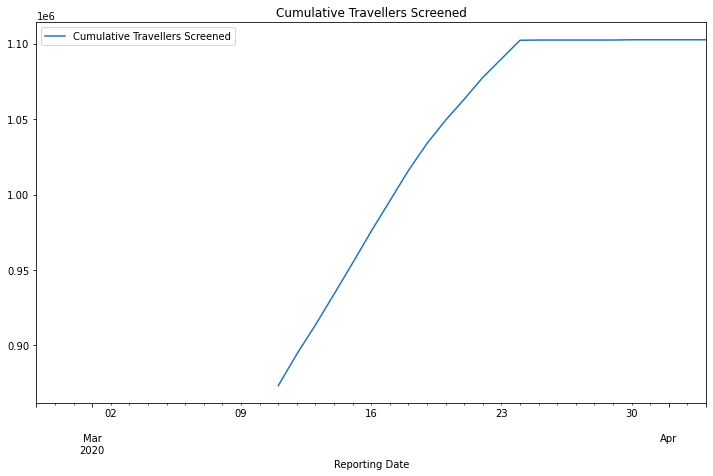

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Cumulative Travellers Screened']].plot(x='Reporting Date',kind='line',ax=ax, title="Cumulative Travellers Screened")

<AxesSubplot:title={'center':'Cumulative Chinese Travellers Screened'}, xlabel='Reporting Date'>

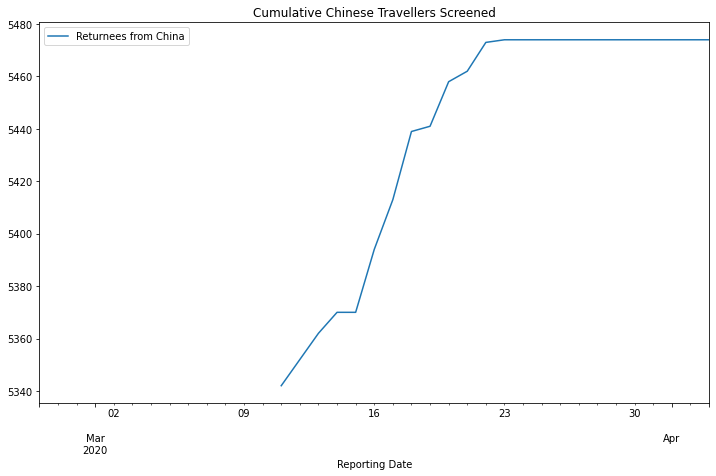

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Returnees from China']].plot(x='Reporting Date',kind='line',ax=ax, title="Cumulative Chinese Travellers Screened")

<AxesSubplot:title={'center':'Cumulative Iranian Travellers Screened'}, xlabel='Reporting Date'>

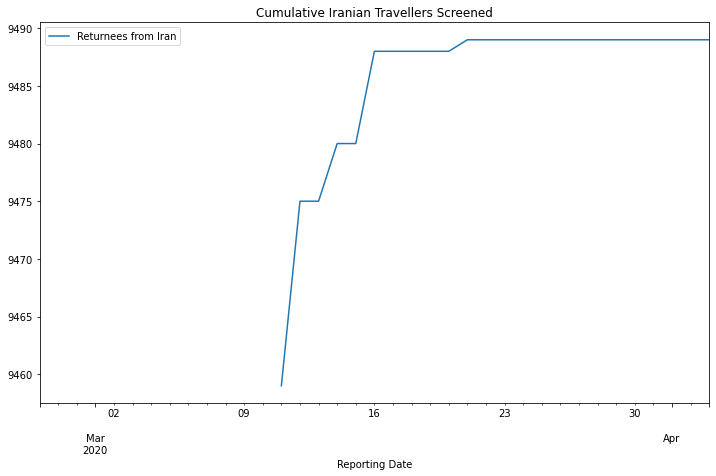

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Returnees from Iran']].plot(x='Reporting Date',kind='line',ax=ax, title="Cumulative Iranian Travellers Screened")

<AxesSubplot:title={'center':'Cumulative Tests Performed Versus Positive Cases and Still Admitted'}, xlabel='Reporting Date'>

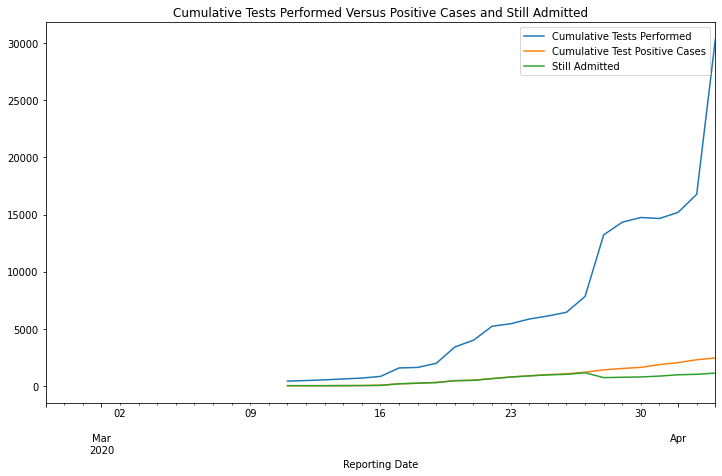

In [12]:
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Count of Confirmed Positive Cases, Tests Performed, and Admitted")
fig, ax = plt.subplots(figsize=(12,7))
df[['Reporting Date','Cumulative Tests Performed','Cumulative Test Positive Cases','Still Admitted']].plot(x='Reporting Date',kind='line', ax=ax, title="Cumulative Tests Performed Versus Positive Cases and Still Admitted")

<AxesSubplot:title={'center':'Pakistan | Positive Cases versus Still Admitted and Expired'}, xlabel='Reporting Date', ylabel='Pakistan | Comparing Count of Suspected, Positive, Admitted and Expired Cases'>

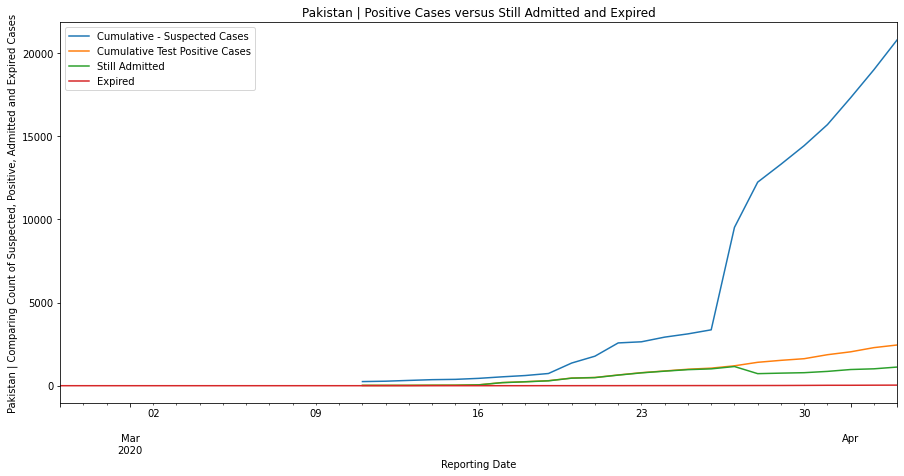

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Pakistan | Comparing Count of Suspected, Positive, Admitted and Expired Cases")
df[['Reporting Date','Cumulative - Suspected Cases','Cumulative Test Positive Cases','Still Admitted','Expired']].plot(x='Reporting Date',kind='line',ax=ax, title="Pakistan | Positive Cases versus Still Admitted and Expired")

<AxesSubplot:title={'center':"Pakistan's Corona Effort(%)"}, xlabel='Reporting Date', ylabel='Positve Rate versus Death Rate'>

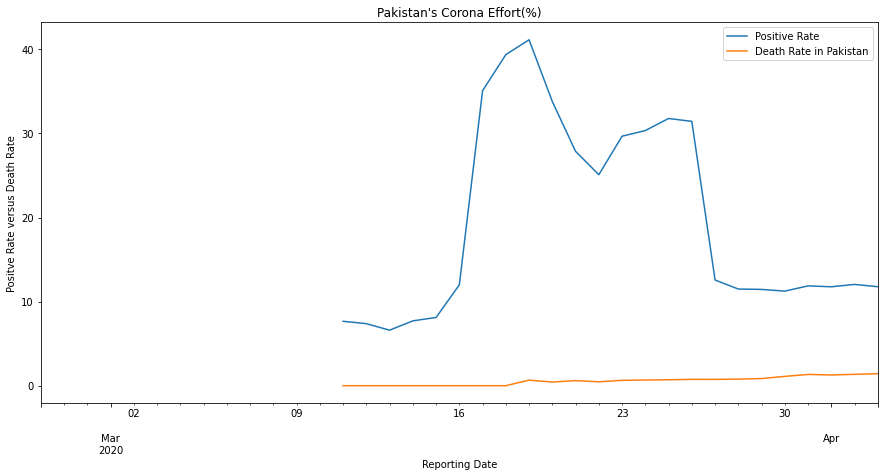

In [14]:
df['Positive Rate'] = (df['Cumulative Test Positive Cases']/df['Cumulative - Suspected Cases'])*100
df['Death Rate in Pakistan'] = (df['Expired']/df['Cumulative Test Positive Cases'])*100
#df[['Positive Rate','Admission Rate','Death Rate']]
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Positve Rate versus Death Rate")
df[['Reporting Date','Positive Rate','Death Rate in Pakistan']].plot(x='Reporting Date',kind='line', ax=ax, title="Pakistan's Corona Effort(%)")

<AxesSubplot:title={'center':'Corona Related Death Rate(%) in Pakistan versus World'}, xlabel='Reporting Date', ylabel='Date Rate(%) in Pakistan versus World'>

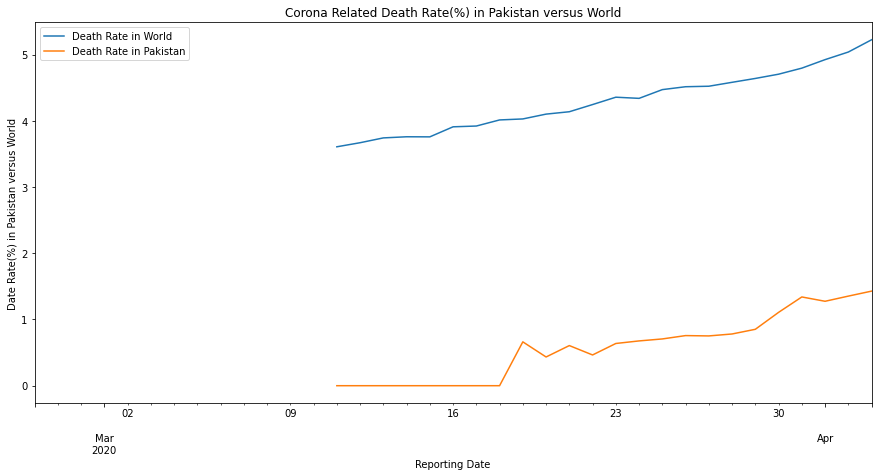

In [15]:
df['Death Rate in World']= (df['Global Deaths']/df['Global Cases'])*100
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Date Rate(%) in Pakistan versus World")
df[['Reporting Date','Death Rate in World','Death Rate in Pakistan']].plot(x='Reporting Date',kind='line',ax=ax, title="Corona Related Death Rate(%) in Pakistan versus World")

<AxesSubplot:title={'center':"Comparison on Lograthmic Scale | Global Positive Cases versus Pakistan's Positive Cases"}, xlabel='Reporting Date', ylabel='Log of Positive Cases in Pakistan versus World'>

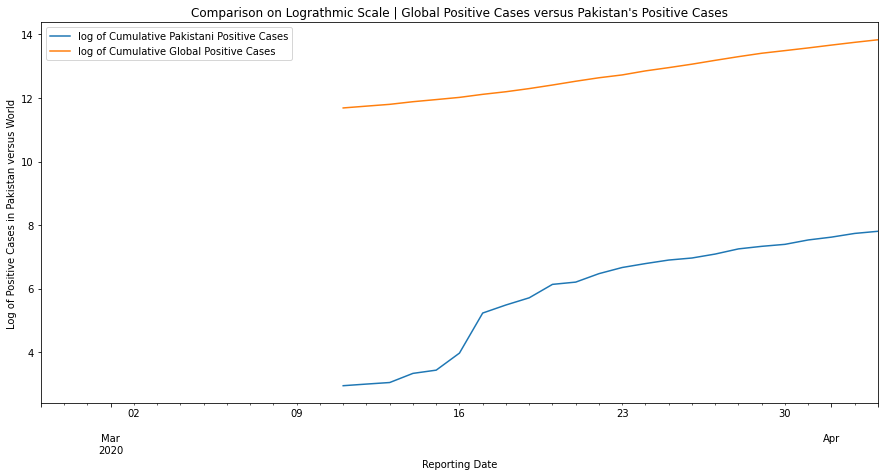

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Positive Cases in Pakistan versus World")

df['log of Cumulative Pakistani Positive Cases']= np.log(df['Cumulative Test Positive Cases'])
df['log of Cumulative Global Positive Cases']= np.log(df['Global Cases'])
df[['Reporting Date','log of Cumulative Pakistani Positive Cases','log of Cumulative Global Positive Cases']].plot(x='Reporting Date',kind='line',ax=ax, title="Comparison on Lograthmic Scale | Global Positive Cases versus Pakistan's Positive Cases")

/home/hammadallauddin/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'Comparison on Lograthmic Scale | Fatalities in Pakistan versus Rest of the World'}, xlabel='Reporting Date', ylabel='Log of Cumulative deaths in Pakistan versus World'>

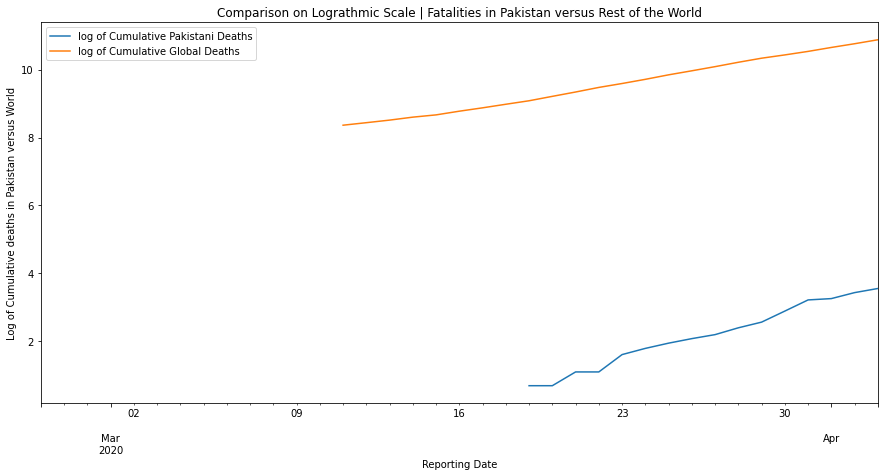

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Cumulative deaths in Pakistan versus World")

df['log of Cumulative Pakistani Deaths']= np.log(df['Expired'])
df['log of Cumulative Global Deaths']= np.log(df['Global Deaths'])
df[['Reporting Date','log of Cumulative Pakistani Deaths','log of Cumulative Global Deaths']].plot(x='Reporting Date',kind='line', ax=ax ,title="Comparison on Lograthmic Scale | Fatalities in Pakistan versus Rest of the World")

/home/hammadallauddin/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'Comparison on Lograthmic Scale | Fatalities in Pakistan versus Rest of the World and Italy'}, xlabel='Reporting Date', ylabel='Log of Counts'>

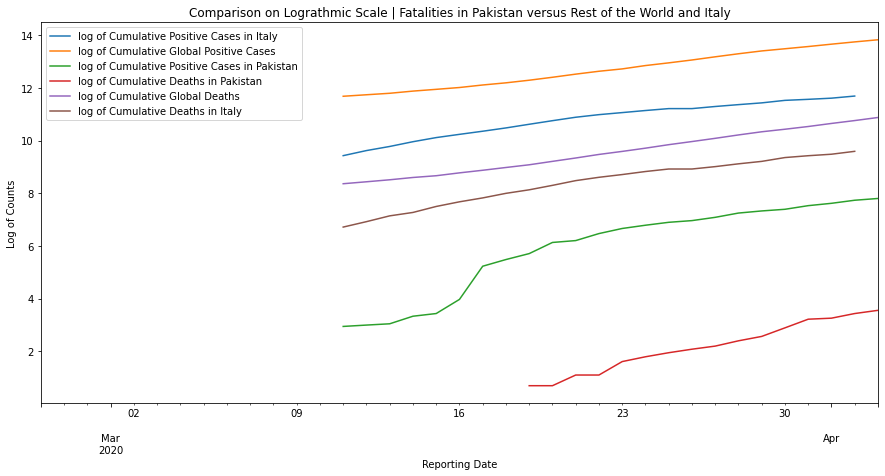

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Reporting Date")
ax.set_ylabel("Log of Counts")

df['log of Cumulative Positive Cases in Pakistan']= np.log(df['Cumulative Test Positive Cases'])
df['log of Cumulative Global Positive Cases']= np.log(df['Global Cases'])
df['log of Cumulative Deaths in Pakistan']= np.log(df['Expired'])
df['log of Cumulative Global Deaths']= np.log(df['Global Deaths'])
df['log of Cumulative Positive Cases in Italy ']= np.log(df['Total Cases in Italy'])
df['log of Cumulative Deaths in Italy']= np.log(df['Total Deaths in Italy'])
df[['Reporting Date','log of Cumulative Positive Cases in Italy ','log of Cumulative Global Positive Cases','log of Cumulative Positive Cases in Pakistan','log of Cumulative Deaths in Pakistan','log of Cumulative Global Deaths','log of Cumulative Deaths in Italy']].plot(x='Reporting Date',kind='line',ax=ax, title="Comparison on Lograthmic Scale | Fatalities in Pakistan versus Rest of the World and Italy")

In [19]:
n_data = df[['Reporting Date','Death Rate in Pakistan', 'Death Rate in World', 'log of Cumulative Pakistani Positive Cases', 'log of Cumulative Global Positive Cases']]
n_data.index = n_data["Reporting Date"]
n_data = n_data.dropna()
n_data.head()

,Reporting Date,Death Rate in Pakistan,Death Rate in World,log of Cumulative Pakistani Positive Cases,log of Cumulative Global Positive Cases
Reporting Date,,,,,
2020-03-11,2020-03-11,0.0,3.608469,2.944439,11.685929
2020-03-12,2020-03-12,0.0,3.669951,2.995732,11.742925
2020-03-13,2020-03-13,0.0,3.742733,3.044522,11.799141
2020-03-14,2020-03-14,0.0,3.759861,3.332205,11.881955
2020-03-15,2020-03-15,0.0,3.758543,3.433987,11.948991


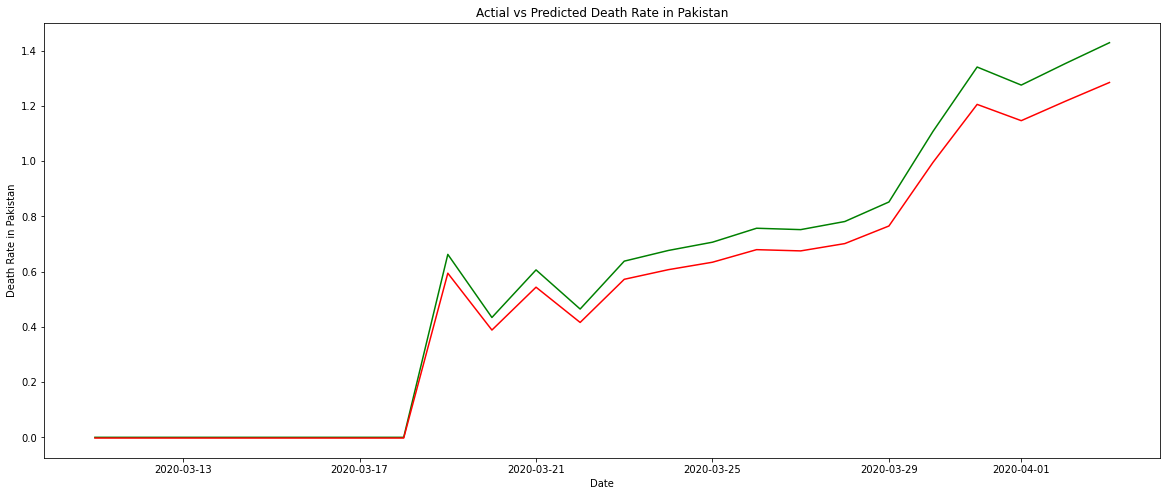

In [20]:
trainX = n_data['Death Rate in Pakistan'].iloc[1:].to_numpy().reshape(-1, 1)
trainY = n_data['Death Rate in Pakistan'].iloc[:-1].to_numpy().reshape(-1, 1)
linerRegression = LinearRegression()
linerRegression.fit(trainX, trainY)
predictions = linerRegression.predict(n_data['Death Rate in Pakistan'].to_numpy().reshape(-1, 1))
testDate = n_data.index
plt.figure(figsize=(20, 8))
plt.plot(testDate, n_data['Death Rate in Pakistan'].to_numpy().reshape(-1, 1), color = 'green', label='Actual Death Rate in Pakistan')
plt.plot(testDate, predictions, color = 'red', label='Predicted Death Rate in Pakistan')
plt.title('Actial vs Predicted Death Rate in Pakistan')
plt.xlabel('Date')
plt.ylabel('Death Rate in Pakistan')
plt.show()

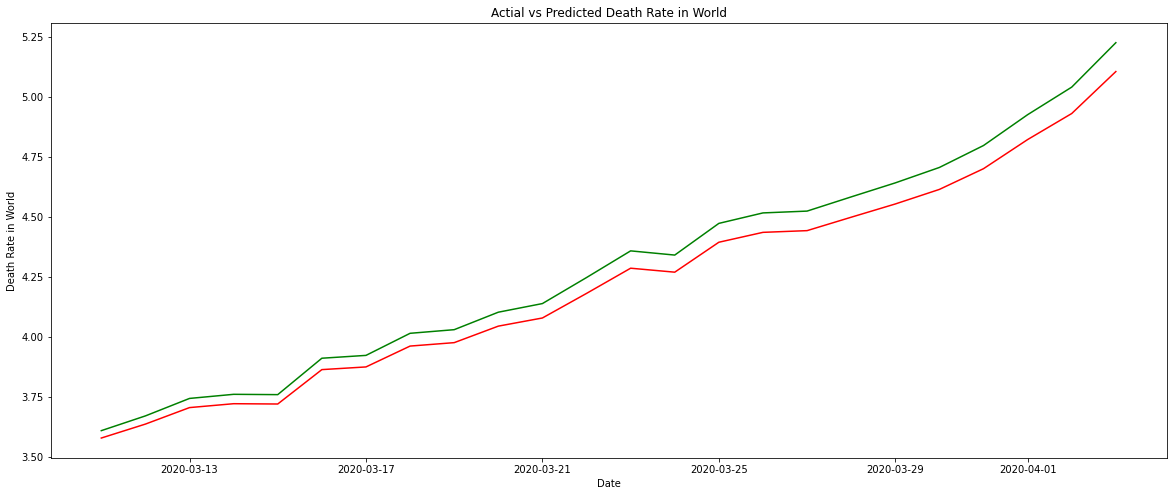

In [21]:
trainX = n_data['Death Rate in World'].iloc[1:].to_numpy().reshape(-1, 1)
trainY = n_data['Death Rate in World'].iloc[:-1].to_numpy().reshape(-1, 1)
linerRegression = LinearRegression()
linerRegression.fit(trainX, trainY)
predictions = linerRegression.predict(n_data['Death Rate in World'].to_numpy().reshape(-1, 1))
testDate = n_data.index
plt.figure(figsize=(20, 8))
plt.plot(testDate, n_data['Death Rate in World'].to_numpy().reshape(-1, 1), color = 'green', label='Actual Death Rate in World')
plt.plot(testDate, predictions, color = 'red', label='Predicted Death Rate in World')
plt.title('Actial vs Predicted Death Rate in World')
plt.xlabel('Date')
plt.ylabel('Death Rate in World')
plt.show()

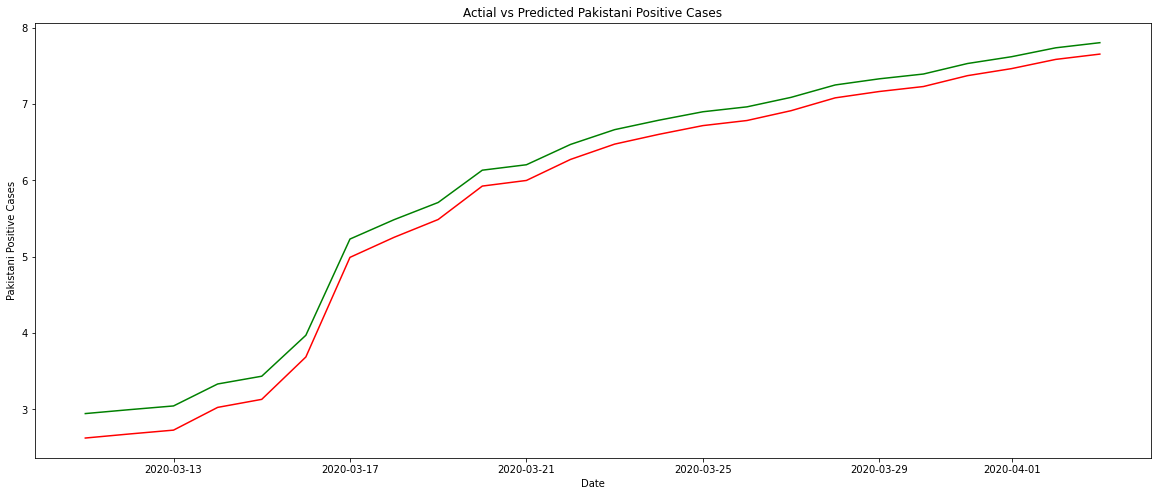

In [22]:
trainX = n_data['log of Cumulative Pakistani Positive Cases'].iloc[1:].to_numpy().reshape(-1, 1)
trainY = n_data['log of Cumulative Pakistani Positive Cases'].iloc[:-1].to_numpy().reshape(-1, 1)
linerRegression = LinearRegression()
linerRegression.fit(trainX, trainY)
predictions = linerRegression.predict(n_data['log of Cumulative Pakistani Positive Cases'].to_numpy().reshape(-1, 1))
testDate = n_data.index
plt.figure(figsize=(20, 8))
plt.plot(testDate, n_data['log of Cumulative Pakistani Positive Cases'].to_numpy().reshape(-1, 1), color = 'green', label='Actual Pakistani Positive Cases')
plt.plot(testDate, predictions, color = 'red', label='Predicted Pakistani Positive Cases')
plt.title('Actial vs Predicted Pakistani Positive Cases')
plt.xlabel('Date')
plt.ylabel('Pakistani Positive Cases')
plt.show()

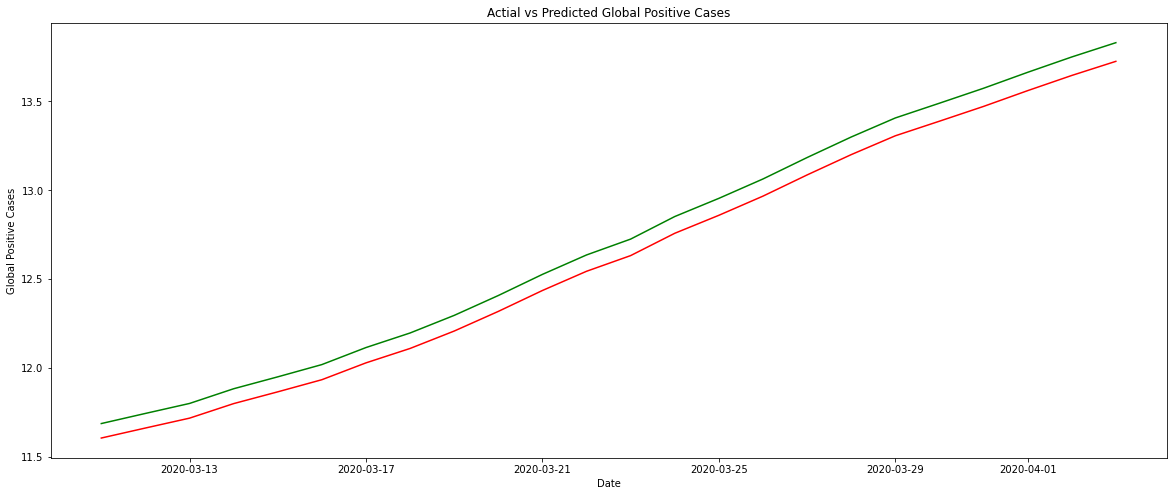

In [23]:
trainX = n_data['log of Cumulative Global Positive Cases'].iloc[1:].to_numpy().reshape(-1, 1)
trainY = n_data['log of Cumulative Global Positive Cases'].iloc[:-1].to_numpy().reshape(-1, 1)
linerRegression = LinearRegression()
linerRegression.fit(trainX, trainY)
predictions = linerRegression.predict(n_data['log of Cumulative Global Positive Cases'].to_numpy().reshape(-1, 1))
testDate = n_data.index
plt.figure(figsize=(20, 8))
plt.plot(testDate, n_data['log of Cumulative Global Positive Cases'].to_numpy().reshape(-1, 1), color = 'green', label='Actual Global Positive Cases')
plt.plot(testDate, predictions, color = 'red', label='Predicted Global Positive Cases')
plt.title('Actial vs Predicted Global Positive Cases')
plt.xlabel('Date')
plt.ylabel('Global Positive Cases')
plt.show()